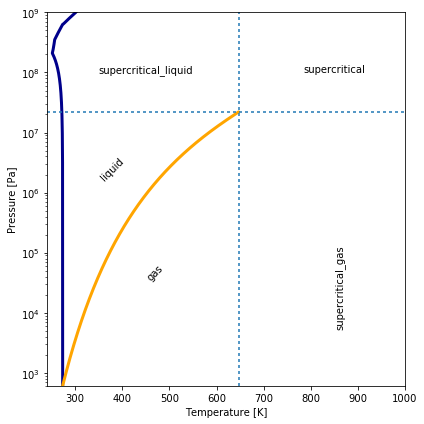

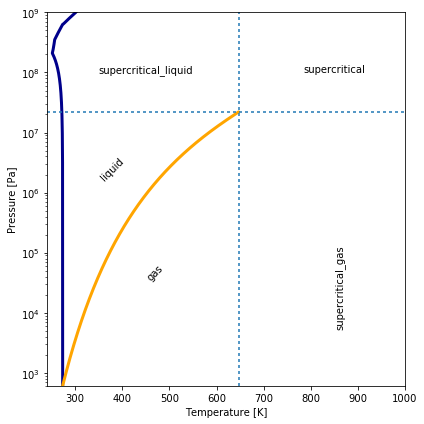

In [4]:
import matplotlib
import numpy as np
import CoolProp as CP
import matplotlib.pyplot as plt
import scipy.interpolate

FluidName = "Water"
Fluid = CP.AbstractState("HEOS", FluidName)
pc = Fluid.keyed_output(CP.iP_critical)
Tc = Fluid.keyed_output(CP.iT_critical)
Tmin = 200
Tmax = 1000
pmax = Fluid.keyed_output(CP.iP_max)
pt = 611.657
Tt = 273.16
fillcolor = 'g'

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
lw = 3

# --------------
# Melting curve
# --------------
melt_args = dict(lw = lw, solid_capstyle = 'round')
TT = []
PP = list(np.logspace(np.log10(pt), np.log10(pmax),1000))
for p in PP:
    TT.append(Fluid.melting_line(CP.iT, CP.iP, p))

#Zone VI
for T in np.linspace(max(TT), 355):
    TT.append(T)
    theta = T/273.31
    pi = 1-1.07476*(1-theta**4.6)
    p = pi*632.4e6
    PP.append(p)

plt.plot(TT,PP,'darkblue',**melt_args)

# ----------------
# Saturation curve
# ----------------
Ts = np.linspace(273.16, Tc, 1000)
ps = CP.CoolProp.PropsSI('P','T',Ts,'Q',0,FluidName)

# ------
# Labels
# ------

plt.plot(Ts,ps,'orange',lw = lw, solid_capstyle = 'round')

# Critical lines
plt.axvline(Tc, dashes = [2, 2])
plt.axhline(pc, dashes = [2, 2])

# Labels
plt.text(850, 1e8, 'supercritical',ha= 'center')
plt.text(850, 1e5, 'supercritical_gas', rotation = 90)
plt.text(450, 1e8, 'supercritical_liquid', rotation = 0, ha = 'center')
plt.text(350, 3e6, 'liquid', rotation = 45)
plt.text(450, 5e4, 'gas', rotation = 45)

plt.ylim(611,1e9)
plt.gca().set_yscale('log')
plt.gca().set_xlim(240, 1000)
plt.ylabel('Pressure [Pa]')
plt.xlabel('Temperature [K]')
plt.tight_layout()

plt.show()